# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Zidan Raihan
**NIM:** 122140100 

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import mediapipe as mp

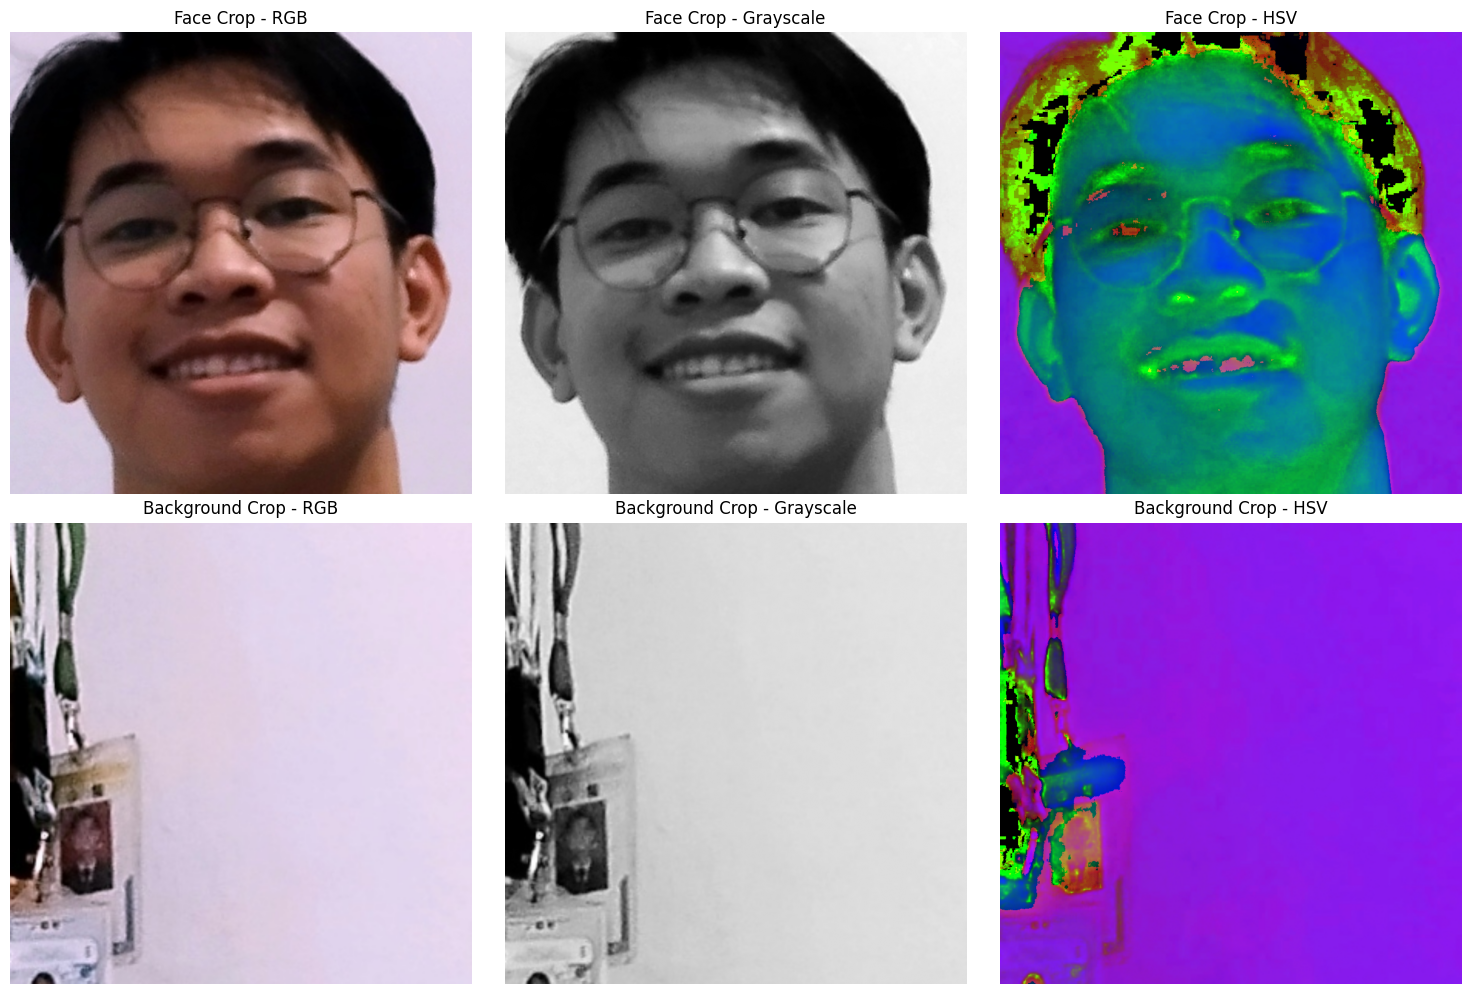

True

In [2]:
# Load gambar
current_dir = os.getcwd()
image_path = os.path.join(current_dir, 'assets_ws4', 'selfie.jpg')
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Cropping area wajah
face_crop = img_rgb[700:1200, 700:1200]

# Cropping area latar belakang
bg_crop = img_rgb[100:400, 500:800] 

# Resize menjadi 920x920 piksel
face_resized = cv2.resize(face_crop, (920, 920))
bg_resized = cv2.resize(bg_crop, (920, 920))

# Konversi ke grayscale dan HSV untuk kedua hasil crop
face_gray = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)
face_hsv = cv2.cvtColor(face_resized, cv2.COLOR_RGB2HSV)

bg_gray = cv2.cvtColor(bg_resized, cv2.COLOR_RGB2GRAY)
bg_hsv = cv2.cvtColor(bg_resized, cv2.COLOR_RGB2HSV)

# Tampilkan hasil cropping wajah (RGB, Grayscale, HSV)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Baris pertama - Face crop
axes[0,0].imshow(face_resized)
axes[0,0].set_title('Face Crop - RGB')
axes[0,0].axis('off')

axes[0,1].imshow(face_gray, cmap='gray')
axes[0,1].set_title('Face Crop - Grayscale')
axes[0,1].axis('off')

axes[0,2].imshow(face_hsv)
axes[0,2].set_title('Face Crop - HSV')
axes[0,2].axis('off')

# Baris kedua - Background crop
axes[1,0].imshow(bg_resized)
axes[1,0].set_title('Background Crop - RGB')
axes[1,0].axis('off')

axes[1,1].imshow(bg_gray, cmap='gray')
axes[1,1].set_title('Background Crop - Grayscale')
axes[1,1].axis('off')

axes[1,2].imshow(bg_hsv)
axes[1,2].set_title('Background Crop - HSV')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil crop using os.getcwd() and os.path.join
face_output_path = os.path.join(current_dir, 'results_ws4', 'face_crop_rgb.jpg')
bg_output_path = os.path.join(current_dir, 'results_ws4', 'bg_crop_rgb.jpg')

cv2.imwrite(face_output_path, cv2.cvtColor(face_resized, cv2.COLOR_RGB2BGR))
cv2.imwrite(bg_output_path, cv2.cvtColor(bg_resized, cv2.COLOR_RGB2BGR))

### Dampak Cropping
- Menghilangkan area yang tidak diperlukan sehingga fokus hanya pada objek yang dibutuhkan.
- Meningkatkan efisiensi pengolahan citra karena ukuran gambar lebih kecil.
- Analisis fitur visual menjadi lebih akurat (misalnya untuk wajah atau latar belakang).

### Dampak Masing-masing
- **RGB**: Menampilkan gambar sesuai warna asli.
- **Grayscale**: Mengubah informasi warna, hanya menyisakan kecerahan (0–255), cocok untuk deteksi tepi dan thresholding.
- **HSV**: Memisahkan warna, kejenuhan, dan kecerahan, sehingga cocok untuk deteksi warna dan *skin detection*, tapi tidak cocok untuk ditampilkan langsung karena akan terliaht aneh dan tidak natural.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


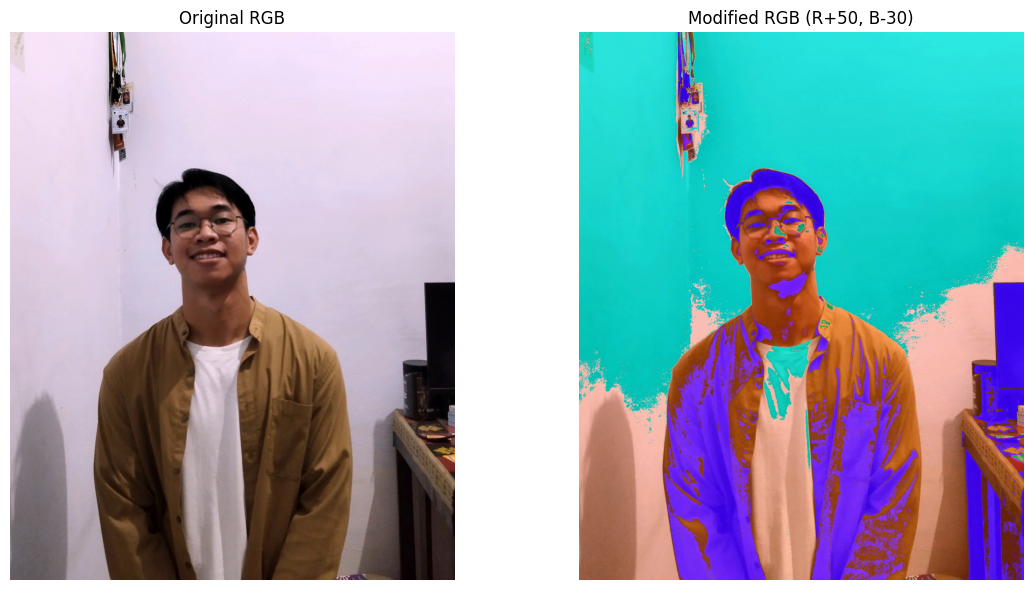

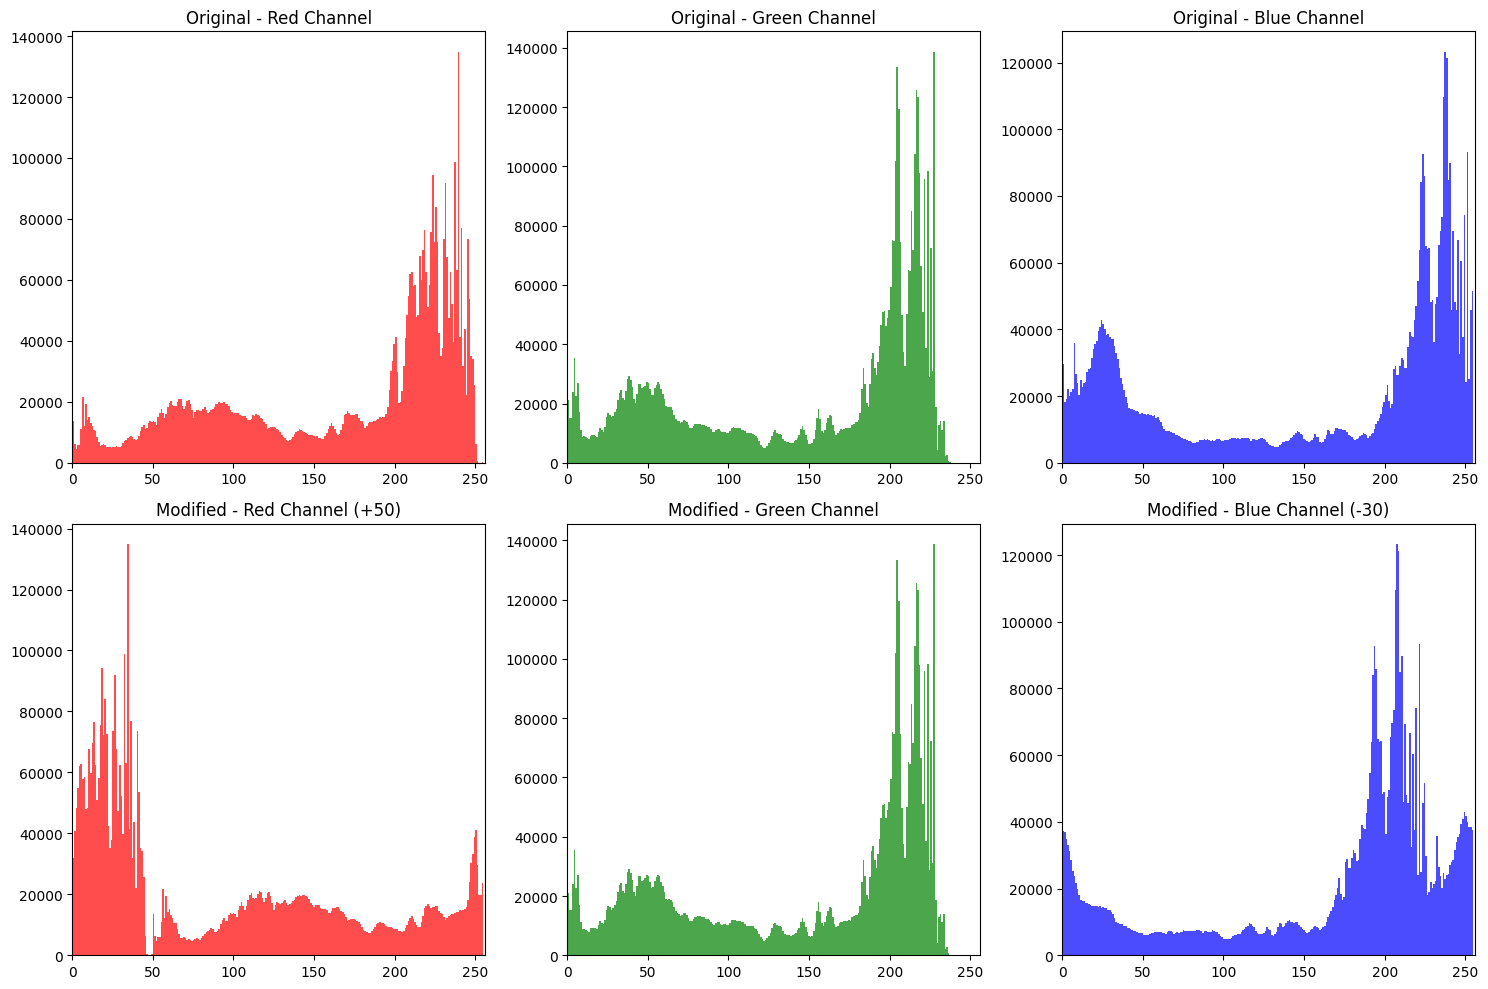

In [3]:
# Pisahkan channel R, G, B
img_r = img_rgb[:, :, 0].copy()
img_g = img_rgb[:, :, 1].copy()
img_b = img_rgb[:, :, 2].copy()

# Menaikkan channel merah sebanyak 50 poin
img_r_modified = np.clip(img_r + 50, 0, 255).astype(np.uint8)

# Turunkan channel biru sebanyak 30 poin
img_b_modified = np.clip(img_b - 30, 0, 255).astype(np.uint8)

# Gabungkan kembali channel yang sudah dimodifikasi
img_modified = np.stack([img_r_modified, img_g, img_b_modified], axis=2)

# Simpan gambar hasil modifikasi dalam format PNG
modified_output_path = os.path.join(current_dir, 'results_ws4', 'img_rgb_modified.png')
cv2.imwrite(modified_output_path, cv2.cvtColor(img_modified, cv2.COLOR_RGB2BGR))

# Menampilkan gambar
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_rgb)
axes[0].set_title('Original RGB')
axes[0].axis('off')

axes[1].imshow(img_modified)
axes[1].set_title('Modified RGB (R+50, B-30)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Tampilkan histogram per channel untuk gambar asli dan hasil modifikasi
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histogram gambar asli
axes[0,0].hist(img_rgb[:,:,0].ravel(), bins=256, color='red', alpha=0.7)
axes[0,0].set_title('Original - Red Channel')
axes[0,0].set_xlim([0, 256])

axes[0,1].hist(img_rgb[:,:,1].ravel(), bins=256, color='green', alpha=0.7)
axes[0,1].set_title('Original - Green Channel')
axes[0,1].set_xlim([0, 256])

axes[0,2].hist(img_rgb[:,:,2].ravel(), bins=256, color='blue', alpha=0.7)
axes[0,2].set_title('Original - Blue Channel')
axes[0,2].set_xlim([0, 256])

# Histogram gambar modifikasi
axes[1,0].hist(img_modified[:,:,0].ravel(), bins=256, color='red', alpha=0.7)
axes[1,0].set_title('Modified - Red Channel (+50)')
axes[1,0].set_xlim([0, 256])

axes[1,1].hist(img_modified[:,:,1].ravel(), bins=256, color='green', alpha=0.7)
axes[1,1].set_title('Modified - Green Channel')
axes[1,1].set_xlim([0, 256])

axes[1,2].hist(img_modified[:,:,2].ravel(), bins=256, color='blue', alpha=0.7)
axes[1,2].set_title('Modified - Blue Channel (-30)')
axes[1,2].set_xlim([0, 256])

plt.tight_layout()
plt.show()

### 🔍 Dampak terhadap Tampilan Gambar
1. **Channel Merah (+50)**
   - Menjadikan seluruh piksel cenderung lebih kemerahan.
   - Warna kulit, objek oranye, dan area bercahaya menjadi lebih hangat.
   - Bagian gambar yang sebelumnya tidak dominan merah menjadi terlihat sedikit merah.

2. **Channel Biru (−30)**
   - Mengurangi intensitas warna biru.
   - Warna biru pada gambar menjadi pucat, kusam, atau hilang.
   - Warna yang seharusnya ungu akan tampak lebih merah, karena biru berkurang dan merah meningkat.

3. **Efek keseluruhan**
   - Gambar jadi tidak enak untuk dipandang karena perubahan warna yang cukup ekstrem

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


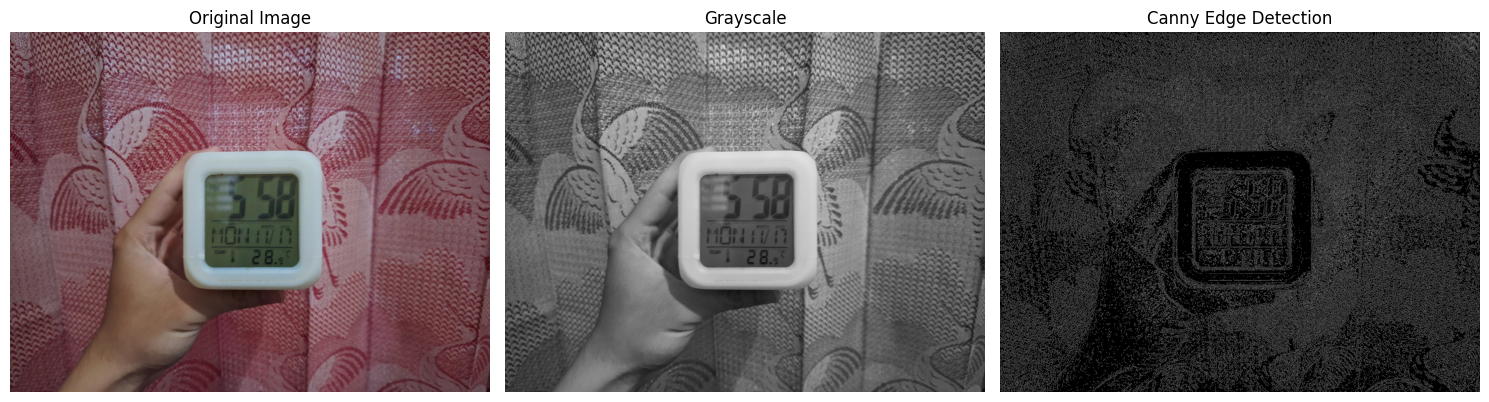

True

In [4]:
# Load gambar objek dengan background bertekstur
object_image_path = os.path.join(current_dir, 'assets_ws4', 'image_2.jpg')
object_img = cv2.imread(object_image_path)
object_img_rgb = cv2.cvtColor(object_img, cv2.COLOR_BGR2RGB)

# Konversi ke grayscale untuk edge detection
object_gray = cv2.cvtColor(object_img_rgb, cv2.COLOR_RGB2GRAY)

# Terapkan Gaussian blur untuk mengurangi noise sebelum edge detection
blurred = cv2.GaussianBlur(object_gray, (5, 5), 0)

# Terapkan Canny edge detection
edges = cv2.Canny(blurred, 10, 20)

# Tampilkan hasil edge detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(object_img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(object_gray, cmap='gray')
axes[1].set_title('Grayscale')
axes[1].axis('off')

axes[2].imshow(edges, cmap='gray')
axes[2].set_title('Canny Edge Detection')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil edge detection
edges_output_path = os.path.join(current_dir, 'results_ws4', 'edges_canny.jpg')
cv2.imwrite(edges_output_path, edges)

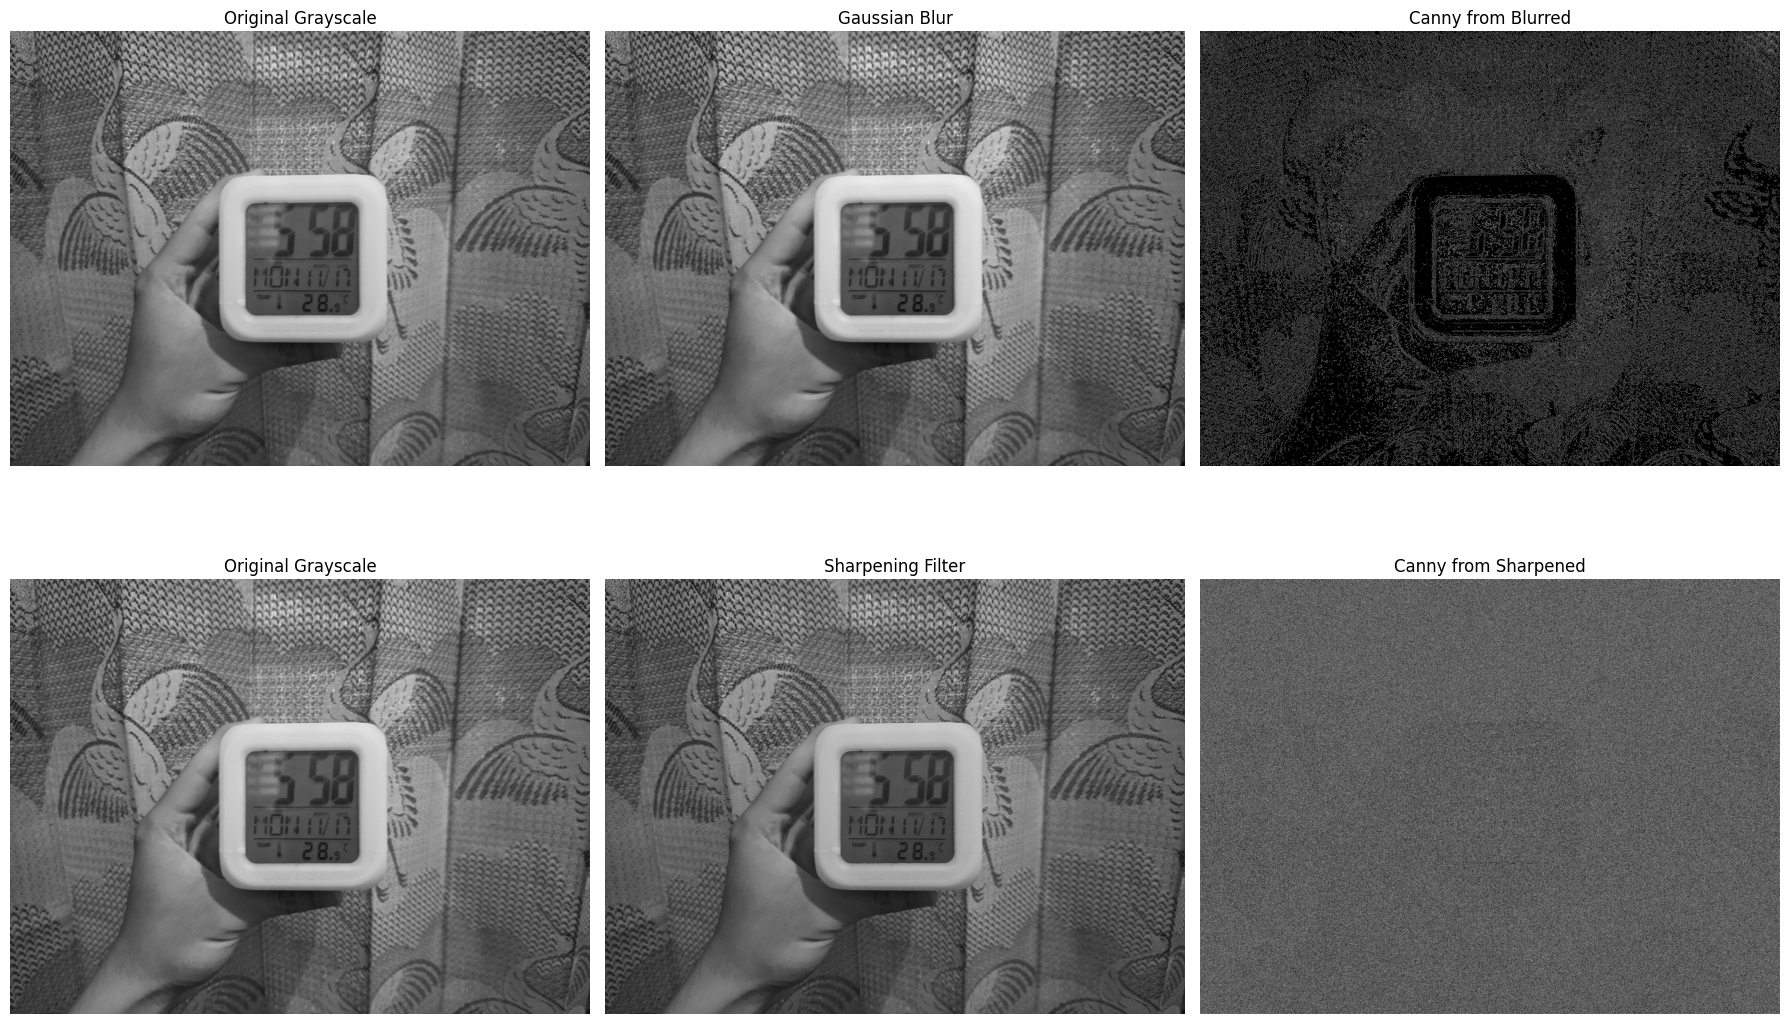

True

In [5]:
# Terapkan filter sharpening pada object_gray
sharpening_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])
object_gray_sharp = cv2.filter2D(object_gray, -1, sharpening_kernel)

# Terapkan Canny edge detection pada hasil sharpening
edges_sharp = cv2.Canny(object_gray_sharp, 10, 30)

# Bandingkan hasil Canny dari blur vs sharpening
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Baris pertama - preprocessing dengan blur
axes[0,0].imshow(object_gray, cmap='gray')
axes[0,0].set_title('Original Grayscale')
axes[0,0].axis('off')

axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Gaussian Blur')
axes[0,1].axis('off')

axes[0,2].imshow(edges, cmap='gray')
axes[0,2].set_title('Canny from Blurred')
axes[0,2].axis('off')

# Baris kedua - preprocessing dengan sharpening
axes[1,0].imshow(object_gray, cmap='gray')
axes[1,0].set_title('Original Grayscale')
axes[1,0].axis('off')

axes[1,1].imshow(object_gray_sharp, cmap='gray')
axes[1,1].set_title('Sharpening Filter')
axes[1,1].axis('off')

axes[1,2].imshow(edges_sharp, cmap='gray')
axes[1,2].set_title('Canny from Sharpened')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil
sharp_gray_output_path = os.path.join(current_dir, 'results_ws4', 'object_gray_sharp.jpg')
edges_sharp_output_path = os.path.join(current_dir, 'results_ws4', 'edges_canny_sharp.jpg')

cv2.imwrite(sharp_gray_output_path, object_gray_sharp)
cv2.imwrite(edges_sharp_output_path, edges_sharp)

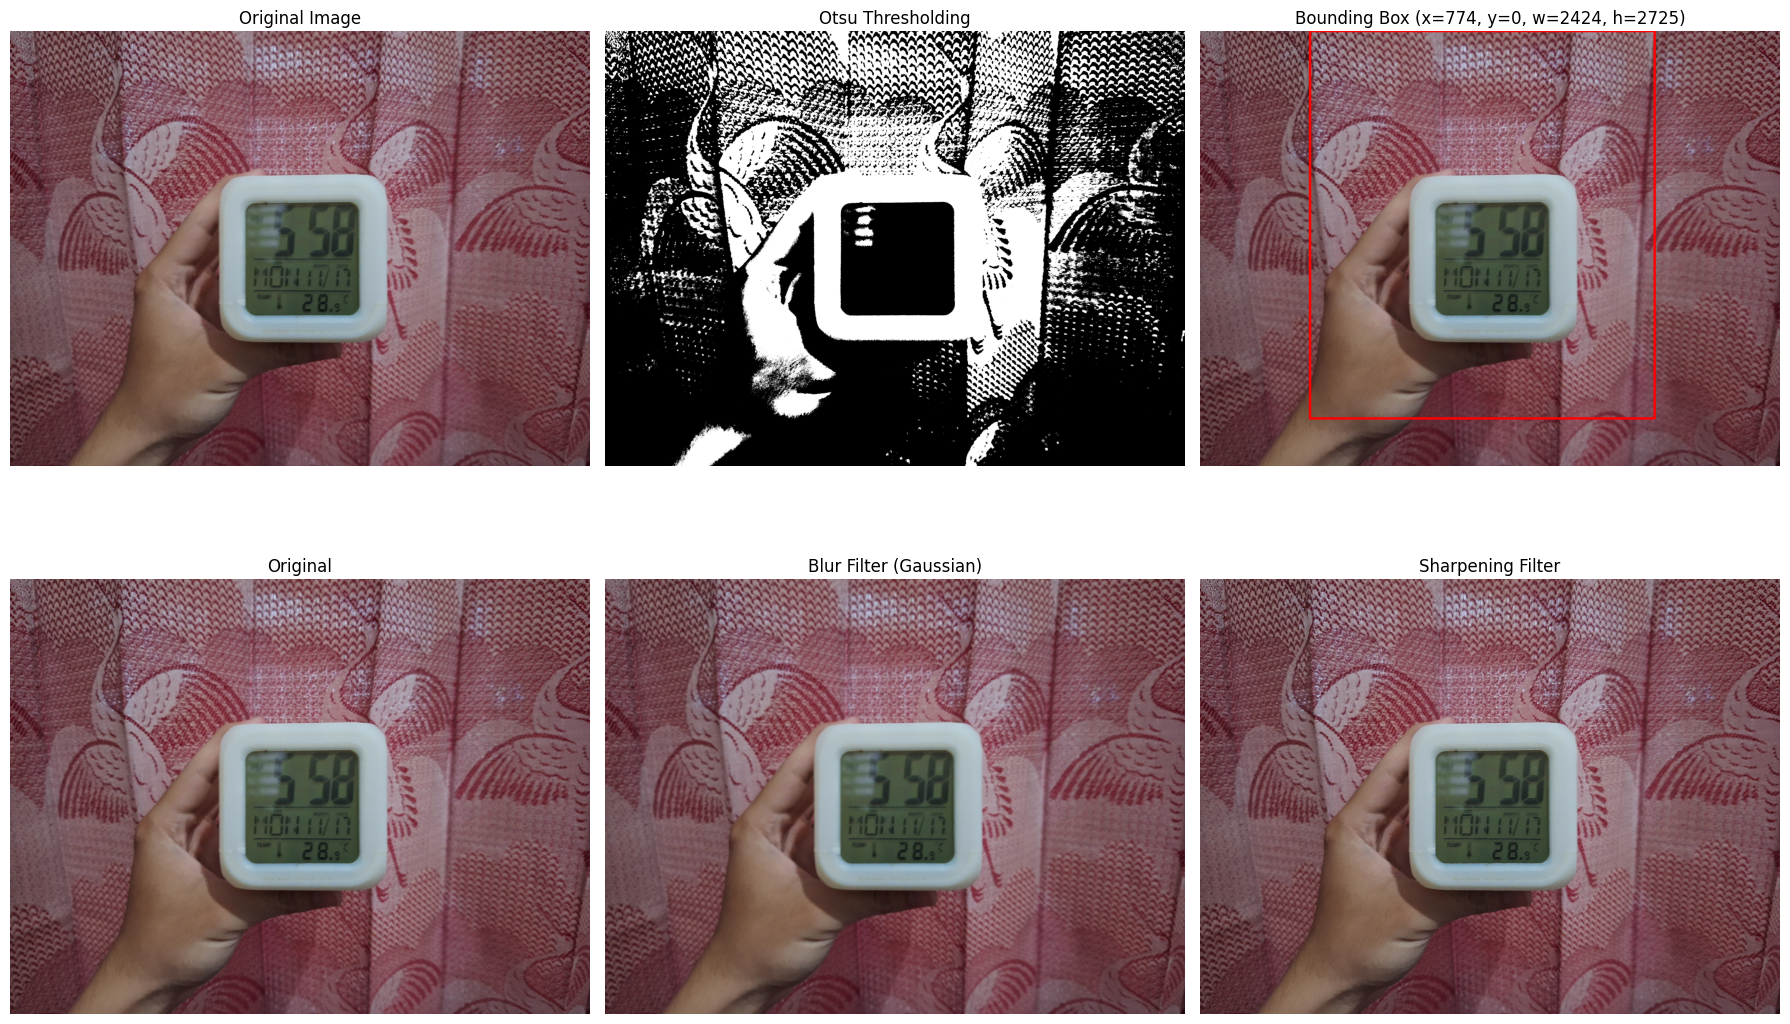

Bounding box coordinates: x=774, y=0, width=2424, height=2725
Otsu threshold value: 106.0


In [6]:
# Thresholding untuk segmentasi objek
# Menggunakan Otsu thresholding pada gambar grayscale
ret, thresh = cv2.threshold(object_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Morphological operations untuk membersihkan noise
kernel = np.ones((5,5), np.uint8)
thresh_clean = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
thresh_clean = cv2.morphologyEx(thresh_clean, cv2.MORPH_OPEN, kernel)

# Mencari kontur untuk membuat bounding box
contours, _ = cv2.findContours(thresh_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Membuat bounding box otomatis dari kontur terbesar
if contours:
    # Mencari kontur dengan area terbesar
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Membuat salinan gambar untuk menggambar bounding box
    img_with_bbox = object_img_rgb.copy()
    cv2.rectangle(img_with_bbox, (x, y), (x+w, y+h), (255, 0, 0), 15)

# Terapkan filter blur (Gaussian Blur)
blur_filtered = cv2.GaussianBlur(object_img_rgb, (15, 15), 0)

# Terapkan filter sharpening menggunakan kernel
sharpening_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])
sharp_filtered = cv2.filter2D(object_img_rgb, -1, sharpening_kernel)

# Tampilkan semua hasil dalam satu grid
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Baris pertama - preprocessing dan segmentasi
axes[0,0].imshow(object_img_rgb)
axes[0,0].set_title('Original Image')
axes[0,0].axis('off')

axes[0,1].imshow(thresh, cmap='gray')
axes[0,1].set_title('Otsu Thresholding')
axes[0,1].axis('off')

axes[0,2].imshow(img_with_bbox)
axes[0,2].set_title(f'Bounding Box (x={x}, y={y}, w={w}, h={h})')
axes[0,2].axis('off')

# Baris kedua - filter blur dan sharpening
axes[1,0].imshow(object_img_rgb)
axes[1,0].set_title('Original')
axes[1,0].axis('off')

axes[1,1].imshow(blur_filtered)
axes[1,1].set_title('Blur Filter (Gaussian)')
axes[1,1].axis('off')

axes[1,2].imshow(sharp_filtered)
axes[1,2].set_title('Sharpening Filter')
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil
thresh_output_path = os.path.join(current_dir, 'results_ws4', 'threshold_otsu.jpg')
bbox_output_path = os.path.join(current_dir, 'results_ws4', 'bounding_box.jpg')
blur_output_path = os.path.join(current_dir, 'results_ws4', 'blur_filter.jpg')
sharp_output_path = os.path.join(current_dir, 'results_ws4', 'sharp_filter.jpg')

cv2.imwrite(thresh_output_path, thresh)
cv2.imwrite(bbox_output_path, cv2.cvtColor(img_with_bbox, cv2.COLOR_RGB2BGR))
cv2.imwrite(blur_output_path, cv2.cvtColor(blur_filtered, cv2.COLOR_RGB2BGR))
cv2.imwrite(sharp_output_path, cv2.cvtColor(sharp_filtered, cv2.COLOR_RGB2BGR))

print(f"Bounding box coordinates: x={x}, y={y}, width={w}, height={h}")
print(f"Otsu threshold value: {ret}")

Proses pengolahan citra pada gambar menunjukkan bahwa setiap filter memberikan efek berbeda terhadap detail visual: Gaussian Blur meratakan nilai piksel sehingga mengurangi noise namun sekaligus melembutkan tepi dan menghilangkan sebagian tekstur, sedangkan Sharpening filter menonjolkan perubahan intensitas sehingga tepi dan tekstur tampak lebih jelas namun noise ikut meningkat; Canny Edge Detection hanya menampilkan garis batas objek berdasarkan perubahan intensitas sehingga tekstur dan warna hilang tetapi struktur tepi menjadi sangat tegas; Otsu Thresholding mengubah citra menjadi hitam-putih biner untuk memisahkan objek dari background sehingga bentuk objek tampak jelas namun detail kecil hilang; sementara Bounding Box tidak mengubah piksel gambar melainkan hanya menandai area yang dideteksi sebagai objek terbesar berdasarkan kontur.


### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

d:\KULIAH\SEMESTER 7\Multimedia\ws4-env\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Face detection confidence: 0.972
Number of face landmarks detected: 478


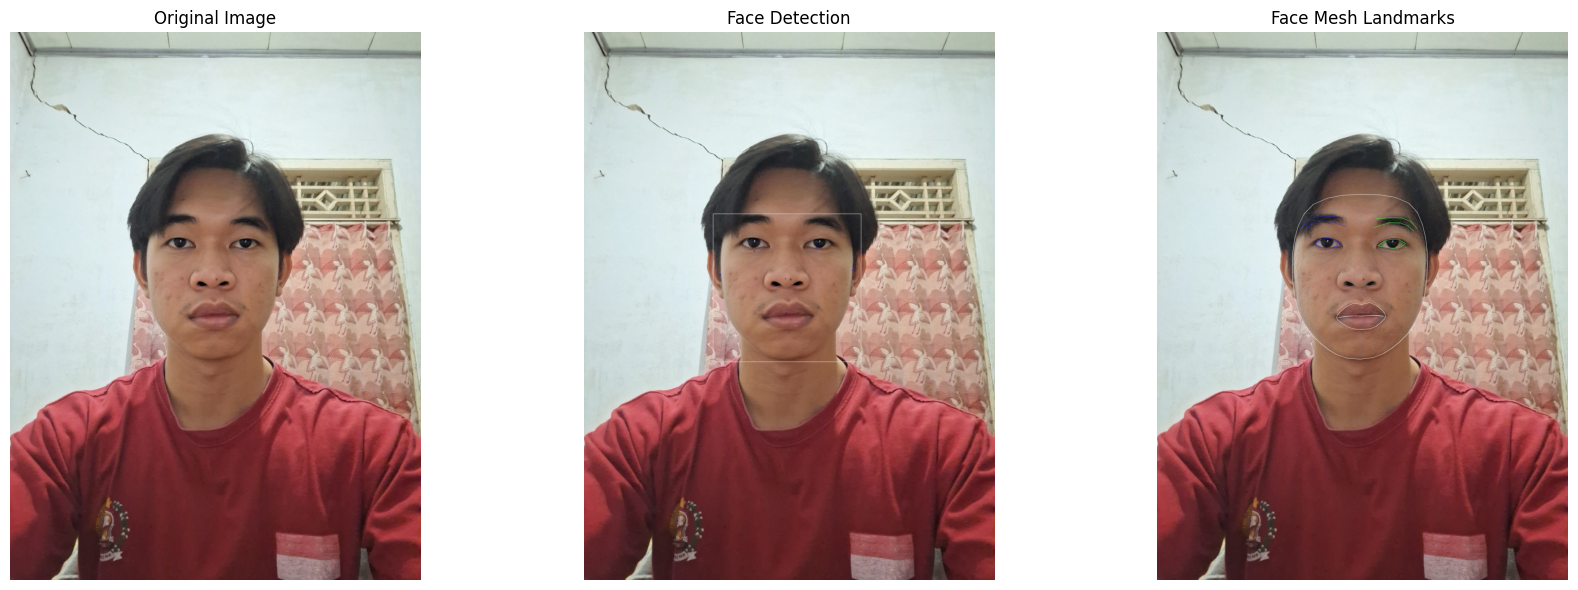

True

In [7]:
# Inisialisasi MediaPipe
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

# Load gambar dari assets_ws4
face_image_path = os.path.join(current_dir, 'assets_ws4', 'image_3.jpg')
face_img = cv2.imread(face_image_path)
face_img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# Inisialisasi MediaPipe Face Mesh dan Face Detection
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    
    with mp_face_detection.FaceDetection(
        model_selection=0, 
        min_detection_confidence=0.5) as face_detection:
        
        # Deteksi wajah
        face_results = face_detection.process(face_img_rgb)
        
        # Deteksi landmark wajah
        mesh_results = face_mesh.process(face_img_rgb)
        
        # Buat salinan gambar untuk annotasi
        annotated_image = face_img_rgb.copy()
        mesh_image = face_img_rgb.copy()
        
        # Gambar bounding box wajah jika terdeteksi
        if face_results.detections:
            for detection in face_results.detections:
                mp_drawing.draw_detection(annotated_image, detection)
                print(f"Face detection confidence: {detection.score[0]:.3f}")
        
        # Gambar landmark wajah jika terdeteksi
        if mesh_results.multi_face_landmarks:
            for face_landmarks in mesh_results.multi_face_landmarks:
                # Gambar mesh wajah dengan koneksi
                mp_drawing.draw_landmarks(
                    image=mesh_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_tesselation_style())
                
                # Gambar kontur wajah
                mp_drawing.draw_landmarks(
                    image=mesh_image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_CONTOURS,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing_styles
                    .get_default_face_mesh_contours_style())
                
                print(f"Number of face landmarks detected: {len(face_landmarks.landmark)}")

# Tampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(face_img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(annotated_image)
axes[1].set_title('Face Detection')
axes[1].axis('off')

axes[2].imshow(mesh_image)
axes[2].set_title('Face Mesh Landmarks')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil
face_detection_output_path = os.path.join(current_dir, 'results_ws4', 'face_detection.jpg')
face_mesh_output_path = os.path.join(current_dir, 'results_ws4', 'face_mesh.jpg')

cv2.imwrite(face_detection_output_path, cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
cv2.imwrite(face_mesh_output_path, cv2.cvtColor(mesh_image, cv2.COLOR_RGB2BGR))

File ditemukan?: True
Status cv2.imread: <class 'numpy.ndarray'>


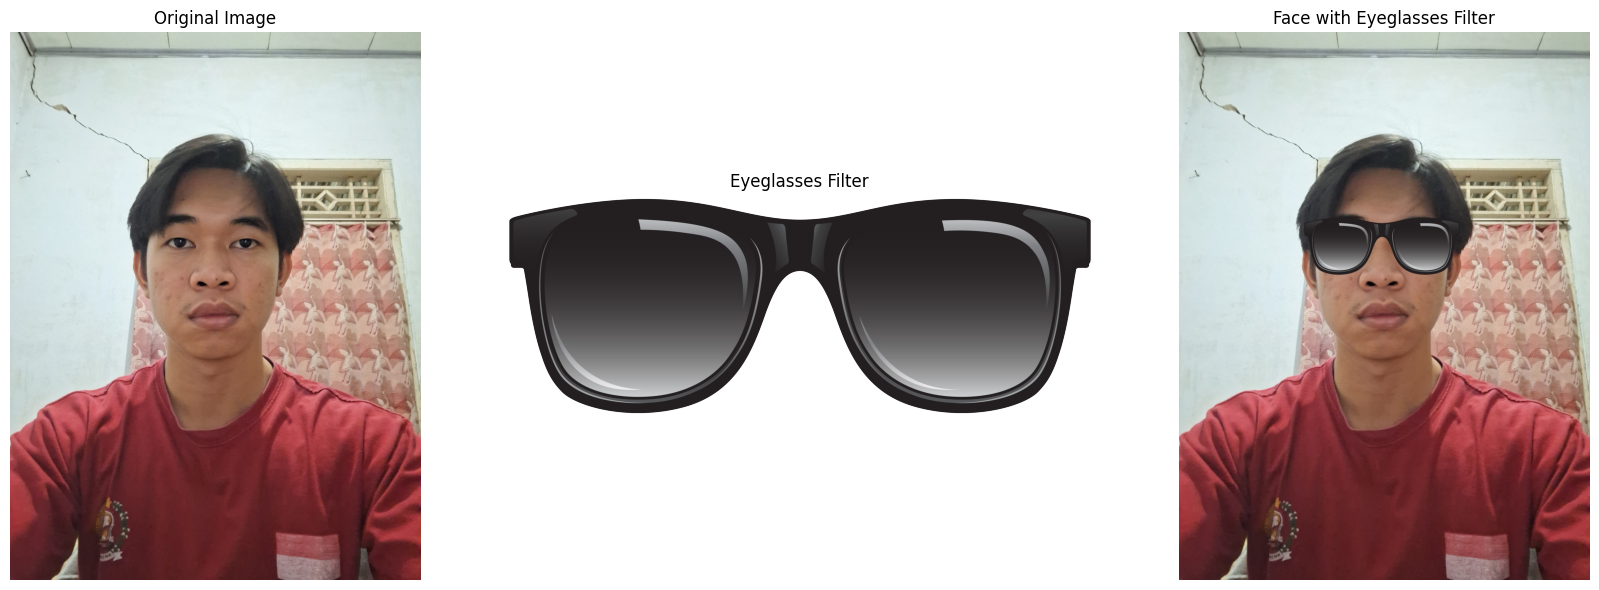

Filter kacamata berhasil diterapkan dengan alpha blending!
Hasil disimpan di: d:\KULIAH\SEMESTER 7\Multimedia\worksheet4\results_ws4\face_with_eyeglasses_filter.jpg


In [8]:
# Load gambar filter kacamata PNG dengan transparansi
glasses_path = os.path.join(current_dir, 'assets_ws4', 'eyeglasses.png')
glasses = cv2.imread(glasses_path, cv2.IMREAD_UNCHANGED)  # IMREAD_UNCHANGED untuk mempertahankan alpha channel
print("File ditemukan?:", os.path.exists(glasses_path))
print("Status cv2.imread:", type(glasses))


# Konversi BGR ke RGB jika glasses memiliki 4 channel (RGBA)
if glasses.shape[2] == 4:
    glasses_rgb = cv2.cvtColor(glasses, cv2.COLOR_BGRA2RGBA)
else:
    glasses_rgb = cv2.cvtColor(glasses, cv2.COLOR_BGR2RGB)

# Buat salinan gambar wajah untuk overlay
face_with_filter = face_img_rgb.copy()

# Proses overlay jika landmark wajah terdeteksi
if mesh_results.multi_face_landmarks:
    for face_landmarks in mesh_results.multi_face_landmarks:
        # Ambil koordinat landmark mata
        h, w, _ = face_img_rgb.shape
        
        # Landmark mata kiri dan kanan (berdasarkan MediaPipe face mesh)
        left_eye_indices = [33, 7, 163, 144, 145, 153, 154, 155, 133]
        right_eye_indices = [362, 382, 381, 380, 374, 373, 390, 249, 263]
        
        # Hitung posisi mata kiri dan kanan
        left_eye_points = []
        right_eye_points = []
        
        for idx in left_eye_indices:
            landmark = face_landmarks.landmark[idx]
            left_eye_points.append([int(landmark.x * w), int(landmark.y * h)])
            
        for idx in right_eye_indices:
            landmark = face_landmarks.landmark[idx]
            right_eye_points.append([int(landmark.x * w), int(landmark.y * h)])
        
        left_eye_points = np.array(left_eye_points)
        right_eye_points = np.array(right_eye_points)
        
        # Hitung center dan ukuran mata
        left_eye_center = np.mean(left_eye_points, axis=0).astype(int)
        right_eye_center = np.mean(right_eye_points, axis=0).astype(int)
        
        # Hitung jarak antar mata untuk skala kacamata
        eye_distance = np.linalg.norm(right_eye_center - left_eye_center)
        
        # Tentukan ukuran kacamata berdasarkan jarak mata
        glasses_width = int(eye_distance * 2.5)
        glasses_height = int(glasses_width * glasses.shape[0] / glasses.shape[1])
        
        # Resize kacamata
        glasses_resized = cv2.resize(glasses_rgb, (glasses_width, glasses_height))
        
        # Hitung posisi untuk menempatkan kacamata
        glasses_center_x = int((left_eye_center[0] + right_eye_center[0]) / 2)
        glasses_center_y = int((left_eye_center[1] + right_eye_center[1]) / 2)
        
        # Posisi top-left untuk overlay
        start_x = glasses_center_x - glasses_width // 2
        start_y = glasses_center_y - glasses_height // 2
        
        # Pastikan kacamata tidak keluar dari frame gambar
        start_x = max(0, start_x)
        start_y = max(0, start_y)
        end_x = min(w, start_x + glasses_width)
        end_y = min(h, start_y + glasses_height)
        
        # Sesuaikan ukuran kacamata jika diperlukan
        actual_width = end_x - start_x
        actual_height = end_y - start_y
        
        if actual_width > 0 and actual_height > 0:
            glasses_final = cv2.resize(glasses_resized, (actual_width, actual_height))
            
            # Alpha blending
            if glasses_final.shape[2] == 4:  # Jika ada alpha channel
                # Pisahkan RGB dan alpha channel
                glasses_rgb_only = glasses_final[:, :, :3]
                alpha_channel = glasses_final[:, :, 3] / 255.0
                
                # Region pada gambar wajah yang akan di-overlay
                face_region = face_with_filter[start_y:end_y, start_x:end_x]
                
                # Alpha blending untuk setiap channel
                for c in range(3):
                    face_region[:, :, c] = (alpha_channel * glasses_rgb_only[:, :, c] + 
                                          (1 - alpha_channel) * face_region[:, :, c])
                
                face_with_filter[start_y:end_y, start_x:end_x] = face_region.astype(np.uint8)
            else:
                # Jika tidak ada alpha channel, gunakan overlay langsung
                face_with_filter[start_y:end_y, start_x:end_x] = glasses_final

# Tampilkan hasil
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(face_img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(glasses_rgb if glasses.shape[2] == 4 else glasses_rgb)
axes[1].set_title('Eyeglasses Filter')
axes[1].axis('off')

axes[2].imshow(face_with_filter)
axes[2].set_title('Face with Eyeglasses Filter')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Simpan hasil
face_with_filter_output_path = os.path.join(current_dir, 'results_ws4', 'face_with_eyeglasses_filter.jpg')
cv2.imwrite(face_with_filter_output_path, cv2.cvtColor(face_with_filter, cv2.COLOR_RGB2BGR))

print("Filter kacamata berhasil diterapkan dengan alpha blending!")
print(f"Hasil disimpan di: {face_with_filter_output_path}")

## Cara Menghitung Posisi Overlay dan Tantangan Implementasi

Proses menentukan posisi overlay kacamata dimulai dengan mengambil koordinat landmark mata kiri dan kanan dari MediaPipe Face Mesh. Titik landmark dikonversi menjadi koordinat piksel menggunakan perhitungan `x = landmark.x * width` dan `y = landmark.y * height`. Dari kumpulan titik pada masing-masing mata, dihitung rata-rata untuk mendapatkan `left_eye_center` dan `right_eye_center`. Jarak antar pusat mata dihitung menggunakan rumus Euclidean dan nilai tersebut digunakan sebagai dasar skala, di mana lebar kacamata ditentukan dengan `glasses_width = eye_distance * 2.5` dan tinggi mengikuti rasio aspek gambar PNG. Titik tengah kacamata dihitung berdasarkan rata-rata posisi dua pusat mata, lalu koordinat top-left dihitung dengan `start_x = center_x - width/2` dan `start_y = center_y - height/2`. Batas koordinat diperiksa agar tidak keluar area gambar sebelum overlay dilakukan. Jika PNG memiliki alpha channel, proses overlay menggunakan alpha blending `pixel = alpha * overlay + (1 - alpha) * background`.

### Tantangan Implementasi
- Landmark wajah bergerak sesuai ekspresi dan pose sehingga posisi overlay dapat tidak stabil, diselesaikan dengan menghitung rata-rata titik landmark.
- Kacamata bisa keluar dari batas gambar apabila wajah terlalu dekat tepi frame.
- Ukuran wajah yang berbeda di setiap gambar, sehingga skala kacamata tidak konsisten.
- PNG transparan memerlukan pemrosesan alpha channel manual agar tidak menutupi seluruh wajah.
- Rotasi kepala belum tertangani sehingga kacamata tidak ikut berputar ketika kepala miring.

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.

##  Credit

- Sumber gambar: https://pngimg.com/image/54432  
- Model AI & Asisten:
  - ChatGPT — OpenAI
  - Claude — Anthropic
- Framework / Dokumentasi Referensi:
  - MediaPipe Face Landmarker — https://ai.google.dev/edge/mediapipe/solutions/vision/face_landmarker
